# Lab 8: Define and Solve an ML Problem of Your Choosing

In [50]:
import pandas as pd
import numpy as np
import nltk
import os 
import time
import gensim
import random
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Sources Used:
Lab Assignments throughout the module have been used as reference for visualization methods and more.

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1) The data set I have chosen is the book review data set. <br/>

2) I will be predicting if a review is positive (true -> positive, false -> not positive or negative). The label is a boolean for the positive review. <br/>

3) This is a supervised learning problem as we will use NLP and neural networks. It is a classification problem. It is binary classification. <br/>

4) The primary feature of this problem is the review itself. After cleaning the data, my features may change depending upon the the words used, length of the review and more. <br/>

5) This is an important problem as review sorting is an important task for any company. Identifying and classifying negative reviews ensures that a company can quickly address any issues and understand customer feedback. Working as a poll, it can help a business understand whether their product or service is doing well and help take any further next steps. Sentiment analysis is a key tool in other examples as well including recommendation systems (based on their reviews), polling insights, and automating customer engagement.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# Inspect Data
print("Shape:", df.shape, "\n")

# Check for any missingness
print("Missing Values:")
print(df.isnull().sum(), "\n")

# Check for how many positive reviews to negative reviews
print("Number of Positive and Negative Reviews:")
print(df["Positive Review"].value_counts(), "\n")

Shape: (1973, 2) 

Missing Values:
Review             0
Positive Review    0
dtype: int64 

Number of Positive and Negative Reviews:
False    993
True     980
Name: Positive Review, dtype: int64 



It appears that there are no missing values. The number of positive and negative reviews are also fairly balanced.

In [4]:
# Find the first five positive reviews
positive_reviews = df.loc[df["Positive Review"] == True, "Review"].head(5)
# Print the first five positive reviews
print("Printing positive reviews:")
for i, review in enumerate(positive_reviews): 
    print(i)
    print(review)

# Find the first five negative reviews
print("Printing negative reviews:")
negative_reviews = df.loc[df["Positive Review"] == False, "Review"].head(5)
# Print the first five negative reviews
for i, review in enumerate(negative_reviews): 
    print(i)
    print(review)

Printing positive reviews:
0
This was perhaps the best of Johannes Steinhoff's books, since it does not  deal with his own stellar yet tragic WW II and post war career. The  insights of the average person living in Germany are of great importance to  both social and military historians alike. Steinhoff offered this  collective testament as a warning to all of us regarding war and the rise  of a dictator. As Johannes said in an interview, &quot;It is always the  civilians who suffer the most, yet are remembered the least.&quot

1
This very fascinating book is a story written in the form of numerous letters and personal diary entries made by the principle character of the book.  It chronicals the life of a young Scottish woman forced to live first in China then Japan.  Well written and historically accurate, it's obvious the author is intimately familiar with the the culture, customs, history and life style of Japan.  This makes the book that much more interesting and fascinating for tho

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1) The feature list is still the same (the book review itself). <br/>

2) The data appears to be ready for modeling. I will split the data into training and testing sets using train_test_split. Instead of using a TF-IDF Vectorizer, I will use word embeddings to transform the text into dense numerical vectors that capture semantic meaning. I will preprocess the text by removing stopwords and applying lemmatization to clean and normalize the data. These embeddings will then be fed into a neural network model.

3) My model is a neural network.

4) I will build a neural network with a specified number of hidden layers and nodes. I will use the stochastic gradient descent optimizer in Keras. For the loss function, I will use binary cross-entropy since this is a binary classification problem. After compiling the model, I will fit it to the training data. During training, I will evaluate the model using metrics such as accuracy and precision. I will tune hyperparameters like the learning rate, number of epochs, number of layers, and nodes to help the model generalize well. Additionally, I may incorporate techniques such as dropout regularization to reduce overfitting.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

## Step 0: Download packages as needed

In [ ]:
# Import all packages

In [ ]:
# Step 1 - Clean the Data + Tokenizer
# Step 2 - Split data into training and testing sets
# Step 3 - Create Word Embeddings
# Step 4 - Build Neural Network
# Step 5 - Compile and Train the Model
# Step 6 - Tune Hyperparameters
# Step 7 - Evaluate final model on Test Data 

In [ ]:
pip install --upgrade nltk

In [ ]:
!python -m nltk.downloader punkt

In [ ]:
!pip install gensim

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## Step 1: Tokenize Text and Clean Data

In [5]:
# Step 1a - Tokenize
from nltk.tokenize import word_tokenize

def tokenize(text):
    words = word_tokenize(text.lower())
    return words
    
df['Clean_Review'] = df['Review'].apply(tokenize)
df.head()

,Review,Positive Review,Clean_Review
0,This was perhaps the best of Johannes Steinhof...,True,"[this, was, perhaps, the, best, of, johannes, ..."
1,This very fascinating book is a story written ...,True,"[this, very, fascinating, book, is, a, story, ..."
2,The four tales in this collection are beautifu...,True,"[the, four, tales, in, this, collection, are, ..."
3,The book contained more profanity than I expec...,False,"[the, book, contained, more, profanity, than, ..."
4,We have now entered a second time of deep conc...,True,"[we, have, now, entered, a, second, time, of, ..."


In [6]:
# Step 1b - Lemmatize with POS Tagging
# Source: GeeksforGeeks
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):  
        return 'a'
    elif tag.startswith('V'):  
        return 'v'
    elif tag.startswith('N'):  
        return 'n'
    elif tag.startswith('R'):  
        return 'r'
    else:
        return 'n' 

def lemmatize_words(tokens):
    tagged = pos_tag(tokens) # add POS tags to each word
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged]
    return lemmatized_words

df["Clean_Review"] = df["Clean_Review"].apply(lemmatize_words)
df.head()

,Review,Positive Review,Clean_Review
0,This was perhaps the best of Johannes Steinhof...,True,"[this, be, perhaps, the, best, of, johannes, s..."
1,This very fascinating book is a story written ...,True,"[this, very, fascinating, book, be, a, story, ..."
2,The four tales in this collection are beautifu...,True,"[the, four, tale, in, this, collection, be, be..."
3,The book contained more profanity than I expec...,False,"[the, book, contain, more, profanity, than, i,..."
4,We have now entered a second time of deep conc...,True,"[we, have, now, enter, a, second, time, of, de..."


## Step 2: Create Testing and Training Sets

In [7]:
# Step 2 - Create Testing and Training Sets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

y = df['Positive Review']
X = df['Clean_Review']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1234)
X_train.head()

500     [there, be, a, reason, this, book, have, sell,...
1047    [there, be, one, thing, that, every, cookbook,...
1667    [be, an, engineer, in, the, aerospace, industr...
1646    [i, have, no, idea, how, this, book, have, rec...
284     [it, be, almost, like, dream, come, true, when...
Name: Clean_Review, dtype: object

## Step 3: Create Word Embeddings

In [9]:
print("Begin")
word2vec_model = gensim.models.Word2Vec(X_train,
                                   vector_size=6000,
                                   window=5,
                                   min_count=1,
                                       epochs=150)
# I tuned the epochs and vector size to increase accuracy


print("End")

Begin
End


In [10]:
words = set(word2vec_model.wv.index_to_key)

print('Begin transforming X_train')
X_train_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_train], dtype=object)
print('Finish transforming X_train')

print('Begin transforming X_test')
X_test_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_test], dtype=object)
print('Finish transforming X_test')

Begin transforming X_train
Finish transforming X_train
Begin transforming X_test
Finish transforming X_test


In [11]:
X_train_feature_vector = []
for w in X_train_word_embeddings:
    if w.size:
        X_train_feature_vector.append(w.mean(axis=0))
    else:
        X_train_feature_vector.append(np.zeros(100, dtype=float))
        
X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(w.mean(axis=0))
    else:
        X_test_feature_vector.append(np.zeros(100, dtype=float))

## Step 4: Build Neural Network Model + Step 5 Compile the Model

In [38]:
# 1. Create model object
vocabulary_size = 6000
nn_model = keras.Sequential()

X_train_np = np.array(X_train_feature_vector)
X_test_np = np.array(X_test_feature_vector)

# 2. Create the input layer and add it to the model object: 
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
nn_model.add(input_layer)


# 3. Create the first hidden layer and add it to the model object:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)
nn_model.add(Dropout(0.4))

# 4. Create the second layer and add it to the model object:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)
nn_model.add(Dropout(0.4))

# 4. Create the third layer and add it to the model object:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)
nn_model.add(Dropout(0.4))

# 6. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)


# Print summary of neural network model structure
nn_model.summary()


loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
adam_optimizer = Adam(learning_rate=0.001)
nn_model.compile(optimizer=adam_optimizer, loss=loss_fn, metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                384064    
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_20 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [14]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [40]:
t0 = time.time() # start time

num_epochs = 100 # epochs

history = nn_model.fit(
    X_train_np,
    y_train,
    epochs = num_epochs,
    verbose=0,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
    validation_split = 0.2,
)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 100], Loss: 0.6315, Accuracy: 0.6577, Val_loss: 0.6041, Val_accuracy: 0.7196
Epoch [10/ 100], Loss: 0.5374, Accuracy: 0.7439, Val_loss: 0.5329, Val_accuracy: 0.7399
Epoch [15/ 100], Loss: 0.5097, Accuracy: 0.7557, Val_loss: 0.4866, Val_accuracy: 0.7736
Epoch [20/ 100], Loss: 0.4483, Accuracy: 0.7929, Val_loss: 0.5018, Val_accuracy: 0.7568
Epoch [25/ 100], Loss: 0.4393, Accuracy: 0.7844, Val_loss: 0.4888, Val_accuracy: 0.7466
Epoch [30/ 100], Loss: 0.4433, Accuracy: 0.7768, Val_loss: 0.4788, Val_accuracy: 0.7804
Epoch [35/ 100], Loss: 0.3962, Accuracy: 0.8115, Val_loss: 0.5165, Val_accuracy: 0.7399
Epoch [40/ 100], Loss: 0.3973, Accuracy: 0.7895, Val_loss: 0.5430, Val_accuracy: 0.7703
Epoch [45/ 100], Loss: 0.3624, Accuracy: 0.8216, Val_loss: 0.5492, Val_accuracy: 0.7770
Epoch [50/ 100], Loss: 0.3683, Accuracy: 0.7988, Val_loss: 0.5663, Val_accuracy: 0.7669
Epoch [55/ 100], Loss: 0.3332, Accuracy: 0.8284, Val_loss: 0.5427, Val_accuracy: 0.7601
Epoch [60/ 100], Loss: 0.3182, Ac

In [41]:
# print accuracy
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

Training accuracy: 0.7954353094100952
Validation accuracy: 0.75


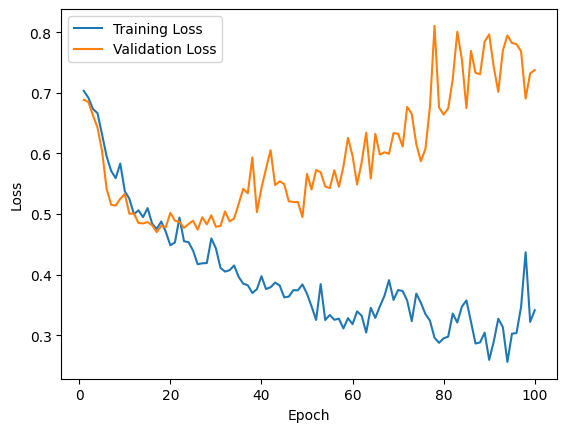

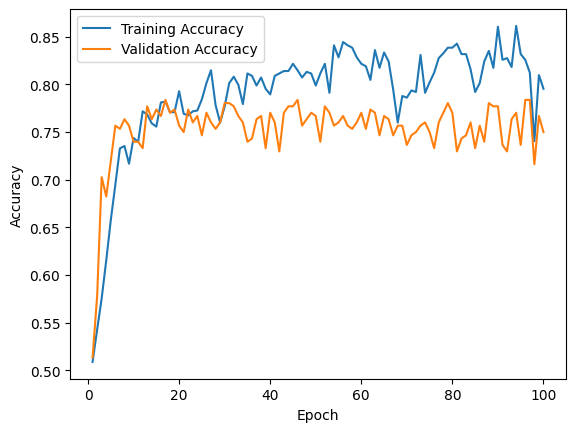

In [49]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Step 6: Tune Hyperparameters: Some Observations I Made
On my first round of evaluating the model. I had an accuracy of nearly 50%, which is the same as guessing. Thus, I had to empirically test various things to find the source of the underfitting.

As I was tuning the model, I tested out various things:
- When I removed the stopwords, the accuracy of the model went down dramatically. I assume this is because it removes important words that help predict sentiment such as not, no, none, etc. Thus, I only stuck to lemmatization.
- Vector size of the word2vec_model => I initally had it at 100 and that was not sufficient, so I opted for 6000 after testing a few parameters.
- Tested between adding dropout layers vs. l2 regularization vs. both.
- Changed the SGD optimizer for Adam optimizer for quicker convergence.

## Step 7: Evaluate Final Model on Test Data 

In [42]:
loss, accuracy = nn_model.evaluate(X_test_np, y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 [==============================] - 0s 778us/step - loss: 0.5973 - accuracy: 0.7429
Loss:  0.5973259806632996 Accuracy:  0.7429149746894836


In [48]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test_np)

print("Predictions for the first 50 examples:")
for i in range(50):
    if(probability_predictions[i][0] > 0.5):
        print(probability_predictions[i], y_test.to_numpy()[i])
    

Predictions for the first 50 examples:
[0.9999815] True
[1.] True
[0.99963593] True
[0.9376109] True
[0.99892026] True
[0.52866155] True
[0.8909583] True
[0.9996191] True
[0.99998486] True
[0.70889956] False
[0.9635382] True
[0.9839773] True
[1.] True
[0.9999953] False
[0.980981] True
[0.6564728] True
[0.59309167] False
[0.9736747] True
[0.84775805] True
[0.9057219] True


## Next Steps + Final Thoughts

Some next steps could include using already established word embeddings that may work better than mine, including GloVe. In addition, I can explore other optimizers than Adam. 

I hope to further my knowledge in the various tuning techniques to ensure the best balance between underfitting and overfitting. This project helped me understand the iterative and time-intensive nature of data cleaning, model training, and model tuning.